In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import astropy.constants as const

import time as timepk

import Bell_EBM as ebm

In [2]:
tic = timepk.time()

# WASP-12b
# planet = ebm.Planet('bell2018', Porb=1.09142030, a=0.02340, rad=1.900, mass=1.470, vWind=10e3, useHealpix=False, nside=15)  # WASP-12b
# star = ebm.Star(teff=6300, rad=1.59, mass=1.20) # WASP-12

# 55 Cnc e, rocky
planet = ebm.Planet('rock', Porb=0.736539, a=0.01544, rad=0.170, mass=0.0254, useHealpix=False, nside=15) # 55 Cnc e
star = ebm.Star(teff=5196, rad=0.943, mass=0.905) # 55 Cnc

# 55 Cnc e, rocky, 3:2
# planet = ebm.Planet('rock', Porb=0.736539, Prot=0.736539*2/3, a=0.01544, rad=0.170, mass=0.0254) # 55 Cnc e
# star = ebm.Star(teff=5196, rad=0.943, mass=0.905) # 55 Cnc

# 55 Cnc e, rocky, 2:1
# planet = ebm.Planet('rock', Porb=0.736539, Prot=0.736539/2, a=0.01544, rad=0.170, mass=0.0254, useHealpix=False, nside=15) # 55 Cnc e
# star = ebm.Star(teff=5196, rad=0.943, mass=0.905) # 55 Cnc

# 55 Cnc e, water, 3:2
# planet = ebm.Planet('water', Porb=0.736539, Prot=0.736539*2/3, a=0.01544, rad=0.170, mass=0.0254, useHealpix=False, nside=15) # 55 Cnc e
# star = ebm.Star(teff=5196, rad=0.943, mass=0.905) # 55 Cnc

# 55 Cnc e, H2, 3:2
# planet = ebm.Planet('gas', Porb=0.736539, Prot=0.736539*2/3, a=0.01544, rad=0.170, mass=0.0254, useHealpix=False, nside=15) # 55 Cnc e
# star = ebm.Star(teff=5196, rad=0.943, mass=0.905) # 55 Cnc

# Lava Earth
# planet = ebm.Planet('rock', a=0.03, rad=const.R_earth.value/const.R_jup.value, mass=const.M_earth.value/const.M_jup.value, useHealpix=False, nside=15) # 55 Cnc e
# star = ebm.Star(teff=6300, rad=1.59, mass=1.20)


system = ebm.System(star, planet)

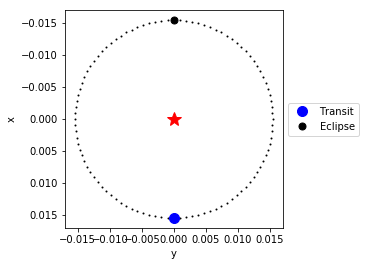

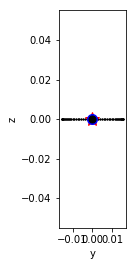

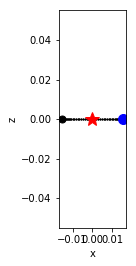

In [3]:
planet.orbit.show_orbit()

Starting Run
Done!


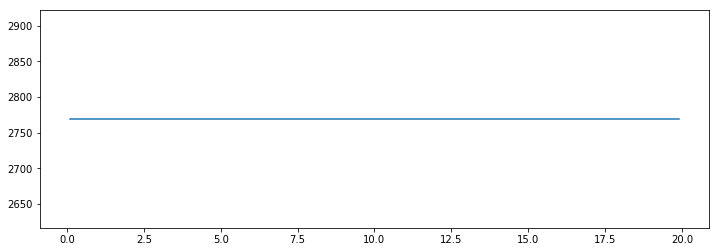

In [4]:
T0 = (np.median(system.Finc(np.linspace(0,planet.Porb,1000, endpoint=False).reshape(-1,1)), axis=0)/const.sigma_sb.value)**0.25
t0 = 0
t1 = system.planet.Porb*20
dt = system.planet.Porb/10

times, maps = system.runModel(T0, t0, t1, dt)

# pick the pixel that is initially the hottest to follow through the code
index = np.argmax(maps[0])

plt.figure(figsize=(12,4))
plt.plot(times/planet.Porb - np.rint(times[0]/planet.Porb), maps[:,index])
plt.show()

Starting Run
Done!


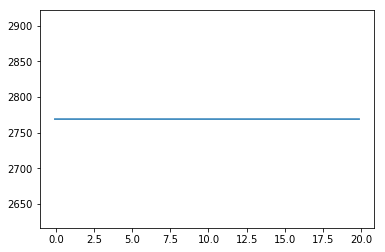

In [5]:
for i in range(1):
    T0 = maps[-1]
    t0 = times[-1]
    t1 = t0+planet.Porb*20
    dt = planet.Porb/100
    
    times, maps = system.runModel(T0, t0, t1, dt)

    if i % 10 == 0:
        plt.plot(times/planet.Porb - np.rint(times[0]/planet.Porb), maps[:,index])
        plt.show()

Starting Run
Done!
Starting Run
Done!


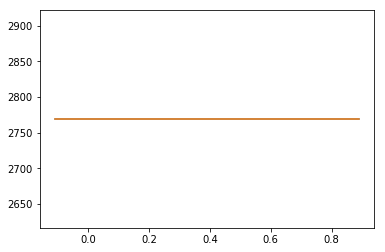

In [6]:
T0 = maps[-1]
t0 = times[-1]
t1 = times[-1]+planet.Porb
dt = planet.Porb/1000

times, maps = system.runModel(T0, t0, t1, dt)

T0 = maps[-1]
t0 = times[-1]
t1 = times[-1]+planet.Porb
dt = planet.Porb/1000
times2, maps2 = system.runModel(T0, t0, t1, dt)

plt.plot(times/planet.Porb - np.rint(times[0]/planet.Porb), maps[:,index])
plt.plot(times2/planet.Porb - np.rint(times2[0]/planet.Porb), maps2[:,index])
plt.show()

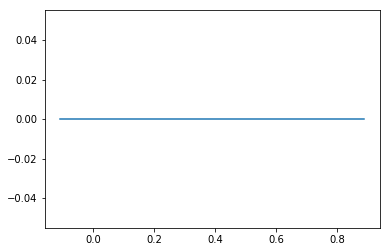

In [7]:
plt.plot(times/planet.Porb - np.rint(times[0]/planet.Porb), maps[:,index]-maps2[:,index])
plt.show()

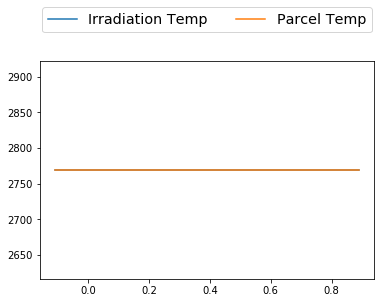

In [8]:
plt.plot(times/planet.Porb - np.rint(times[0]/planet.Porb), (system.Finc(times)[:,index]/const.sigma_sb.value)**0.25, label='Irradiation Temp')
plt.plot(times/planet.Porb - np.rint(times[0]/planet.Porb), maps[:,index], label='Parcel Temp')
plt.legend(loc=8, bbox_to_anchor=(0.5,1.1), fontsize='x-large', ncol=2)
plt.show()

In [9]:
print('Energy Balance Check (should be small for synchronously rotating planets with no winds)')
fin = np.sum((system.Finc(times)[:,index]/const.sigma_sb.value)**0.25)
print((fin-np.sum(maps[:,index]))/fin)

Energy Balance Check (should be small for synchronously rotating planets with no winds)
0.0


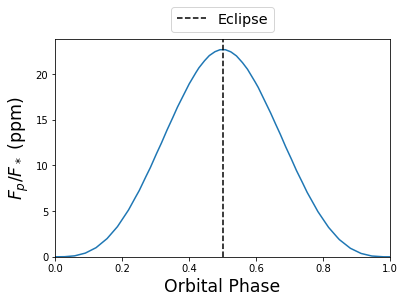

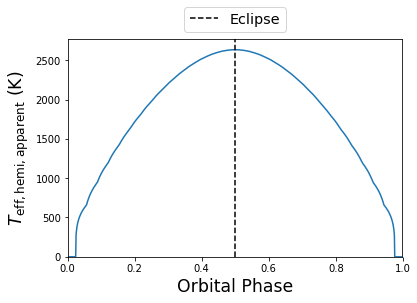

In [10]:
system.plot_lightcurve(times, maps)
plt.show()
plt.close()

system.plot_tempcurve(times, maps)
plt.show()
plt.close()

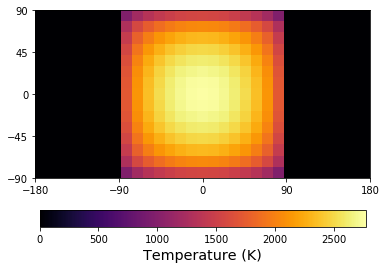

In [11]:
fig = system.planet.showMap(maps[-1], times[-1])
plt.show()
plt.close()

if planet.plType=='bell2018':
    fig = system.planet.showDissociation(maps[-1], times[-1])
    plt.show()
    plt.close()

In [12]:
toc = timepk.time()
print('Full run took:', toc-tic, 'seconds')

Full run took: 18.706775903701782 seconds


In [ ]:
# for i in range(12):

#     if i ==0:
#         # WASP-12b, H2, mild wind
#         name = 'WASP12b_h2_5wind'
#         planet = ebm.Planet('gas', Porb=1.09142030, a=0.02340, rad=1.900, mass=1.470, vWind=5e3)  # WASP-12b
#         star = ebm.Star(teff=6300, rad=1.59, mass=1.20) # WASP-12

#     elif i == 1:
#         # WASP-12b, H2+H, mild wind
#         name = 'WASP12b_bell2018_5wind'
#         planet = ebm.Planet('bell2018', Porb=1.09142030, a=0.02340, rad=1.900, mass=1.470, vWind=5e3)  # WASP-12b
#         star = ebm.Star(teff=6300, rad=1.59, mass=1.20) # WASP-12

#     elif i == 2:
#         # 55 Cnc e, rocky
#         name = '55Cnce_rocky'
#         planet = ebm.Planet('rock', Porb=0.736539, a=0.01544, rad=0.170, mass=0.0254) # 55 Cnc e
#         star = ebm.Star(teff=5196, rad=0.943, mass=0.905) # 55 Cnc
    
#     elif i == 3:
#         # 55 Cnc e, rocky, 3:2
#         name = '55Cnce_rocky_3v2'
#         planet = ebm.Planet('rock', Porb=0.736539, Prot=0.736539*2/3, a=0.01544, rad=0.170, mass=0.0254) # 55 Cnc e
#         star = ebm.Star(teff=5196, rad=0.943, mass=0.905) # 55 Cnc
    
#     elif i == 4:
#         # 55 Cnc e, rocky, 2:1
#         name = '55Cnce_rocky_2v1'
#         planet = ebm.Planet('rock', Porb=0.736539, Prot=0.736539/2, a=0.01544, rad=0.170, mass=0.0254) # 55 Cnc e
#         star = ebm.Star(teff=5196, rad=0.943, mass=0.905) # 55 Cnc
    
#     elif i == 5:
#         # 55 Cnc e, water, 3:2
#         name = '55Cnce_water_3v2'
#         planet = ebm.Planet('water', Porb=0.736539, Prot=0.736539*2/3, a=0.01544, rad=0.170, mass=0.0254) # 55 Cnc e
#         star = ebm.Star(teff=5196, rad=0.943, mass=0.905) # 55 Cnc

#     elif i == 6:
#         # 55 Cnc e, H2, 3:2
#         name = '55Cnce_h2_3v2'
#         planet = ebm.Planet('gas', Porb=0.736539, Prot=0.736539*2/3, a=0.01544, rad=0.170, mass=0.0254) # 55 Cnc e
#         star = ebm.Star(teff=5196, rad=0.943, mass=0.905) # 55 Cnc

#     elif i == 7:
#         # 55 Cnc e, H2+H, 3:2
#         name = '55Cnce_bell2018_3v2'
#         planet = ebm.Planet('bell2018', Porb=0.736539, Prot=0.736539*2/3, a=0.01544, rad=0.170, mass=0.0254) # 55 Cnc e
#         star = ebm.Star(teff=5196, rad=0.943, mass=0.905) # 55 Cnc
        
#     elif i == 8:
#         # Eccentric Rocky, Pseudo-synchronously rotating
#         name = 'eccentric_rocky'
#         planet = ebm.Planet('rock', a=0.1, e=0.3, rad=const.R_earth.value/const.R_jup.value, mass=const.M_earth.value/const.M_jup.value)
#         star = ebm.Star()
#         system = ebm.System(star, planet)
#         system.planet.update()
#         planet = system.planet
        
#     elif i == 9:
#         # Eccentric Rocky, Pseudo-synchronously rotating
#         name = 'eccentric_rocky_3v2'
#         planet = ebm.Planet('rock', a=0.1, e=0.3, rad=const.R_earth.value/const.R_jup.value, mass=const.M_earth.value/const.M_jup.value)
#         star = ebm.Star()
#         system = ebm.System(star, planet)
#         system.planet.Prot_input = system.planet.Porb*2/3
#         system.planet.Prot = system.planet.Porb*2/3
#         system.planet.update()
#         planet = system.planet
        
#     elif i == 10:
#         # Eccentric Rocky, Pseudo-synchronously rotating
#         name = 'eccentric_water'
#         planet = ebm.Planet('water', a=0.1, e=0.3, rad=const.R_earth.value/const.R_jup.value, mass=const.M_earth.value/const.M_jup.value)
#         star = ebm.Star()
#         system = ebm.System(star, planet)
#         system.planet.update()
#         planet = system.planet
        
#     elif i == 11:
#         # Eccentric Rocky, Pseudo-synchronously rotating
#         name = 'eccentric_water_3v2'
#         planet = ebm.Planet('water', a=0.1, e=0.3, rad=const.R_earth.value/const.R_jup.value, mass=const.M_earth.value/const.M_jup.value)
#         star = ebm.Star()
#         system = ebm.System(star, planet)
#         system.planet.Prot_input = system.planet.Porb*2/3
#         system.planet.Prot = system.planet.Porb*2/3
#         system.planet.update()
#         planet = system.planet


#     system = ebm.System(star, planet)
    
    
#     if os.path.isdir(savepathroot+name+'/'):
#         print('Warning: This directory already exists and its files will be overwritten if you continue!')
#     else:
#         os.mkdir(savepathroot+name+'/')

#     # Run initial burn-in
#     T0 = (np.median(system.Finc(np.linspace(0,planet.Porb,1000, endpoint=False).reshape(-1,1)), axis=0)/const.sigma_sb.value)**0.25
#     t0 = 0
#     t1 = system.planet.Porb*20
#     dt = system.planet.Porb/10
#     times, maps = system.runModel(T0, t0, t1, dt, verbose=False)

#     # Run a higher time resolution burn-in to clean up any remaining mess
#     T0 = maps[-1]
#     t0 = times[-1]
#     t1 = t0+planet.Porb*20
#     dt = planet.Porb/100
#     times, maps = system.runModel(T0, t0, t1, dt, verbose=False)

#     # Get the final orbit for plotting
#     T0 = maps[-1]
#     t0 = times[-1]
#     t1 = t0+planet.Porb
#     dt = planet.Porb/1000
#     times, maps = system.runModel(T0, t0, t1, dt, verbose=False)

#     # Plot the lightcurve
#     fig = system.plot_lightcurve(times, maps, bolo=False)
#     plt.title(name)
#     plt.show()
#     plt.close()

#     # Plot the temperature curve
#     fig = system.plot_tempcurve(times, maps)
#     plt.title(name)
#     plt.show() 
#     plt.close()

#     # Plot the planet's temperature map at periastron
#     index = np.argmin(((times % system.planet.Porb)-system.planet.orbit.get_peri_time())**2)
#     fig = system.planet.showMap(maps[index], times[index])
#     plt.title(name)
#     plt.show()
#     plt.close()

#     if planet.plType=='bell2018':
#         # Plot the planet's dissociation map
#         fig = system.planet.showDissociation(maps[-1], times[-1])
#         plt.title(name)
#         plt.show()
#         plt.close()